In [1]:
%pylab inline
import sys 
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sympy import *

Populating the interactive namespace from numpy and matplotlib


## Create data toy

In [67]:
nb_obj = 1000

x_single = np.linspace(-5,5,100)
x = np.resize(x_single,(3,len(x_single)))

### Gaussian curves

In [68]:
def fun_gauss(x,mu,sigma):
    y_out =  np.exp( - (x - mu)**2 / (2 * sigma**2))
    return y_out


mu = random.uniform(-2, 2, nb_obj)
sigma = random.uniform(0, 2, nb_obj)

y_gauss = []
for i in range(nb_obj):
    shape = fun_gauss(x_single,mu[i],sigma[i])
    if choice([1,0])==1:
        y_gauss.append(-shape)
    else :
        y_gauss.append(shape)

### Double step functions

In [69]:
width = random.uniform(1, 1.5, nb_obj)
width2 = random.uniform(1, 1.5, nb_obj)
start = random.uniform(-5, 2, nb_obj)
height = random.uniform(-3, 3, nb_obj)
height2 = random.uniform(-3, 3, nb_obj)

y_step = []
for i in range(nb_obj):
    temporary = []
    for j in x_single:
        
        if start[i]<j<start[i]+width[i]:
            temporary.append(height[i])
        elif start[i]+width[i]<j<start[i]+width[i]+width2[i]:
            temporary.append(height2[i])
        else :
            temporary.append(0)
    y_step.append(temporary)

### Line functions

In [70]:
a = random.uniform(-2,2, nb_obj)
b = random.uniform(0, 2, nb_obj)

y_line = []
for i in range(nb_obj):
    y_line.append(a[i]*x_single+b[i])

## Plot random toys 

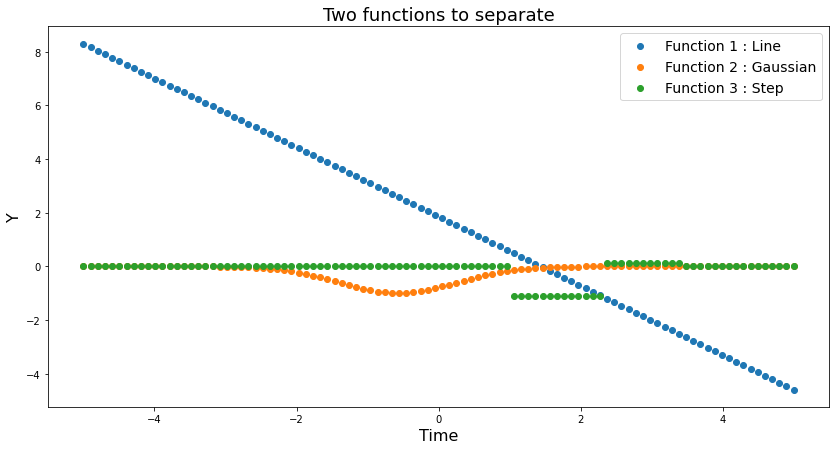

In [71]:
show = randint(0,nb_obj)

plt.figure(figsize=(14,7))

plt.scatter(x_single,y_line[show],label='Function 1 : Line')
plt.scatter(x_single,y_gauss[show],label='Function 2 : Gaussian')
plt.scatter(x_single,y_step[show],label='Function 3 : Step')


plt.title('Two functions to separate',fontsize = 18)
plt.xlabel('Time',fontsize = 16)
plt.ylabel('Y',fontsize = 16)
plt.legend(fontsize = 14)
plt.pause(1)

## Feature extraction
### Compute standard deviation and mean of each toy

In [72]:
std_gauss = np.std(y_gauss,axis=1)
mean_gauss = np.mean(y_gauss,axis=1)

std_line = np.std(y_line,axis=1)
mean_line = np.mean(y_line,axis=1)

std_step = np.std(y_step,axis=1)
mean_step = np.mean(y_step,axis=1)

### Plot the parameter space

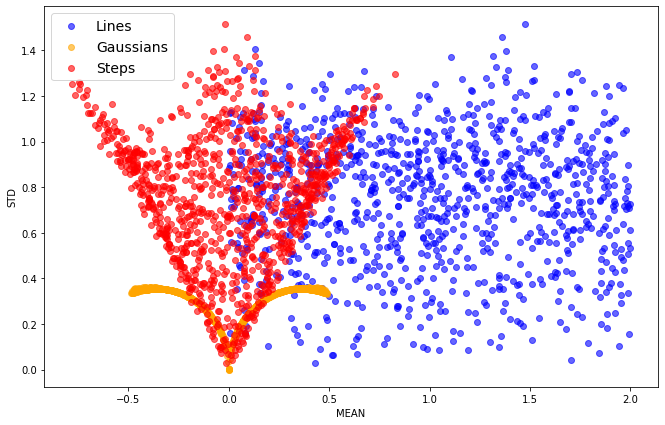

In [74]:
plt.figure(figsize=(11,7))

plt.scatter(mean_line,std_step,label = 'Lines',c='blue',alpha = 0.6)
plt.scatter(mean_gauss,std_gauss,label = 'Gaussians',c='orange',alpha = 0.6)
plt.scatter(mean_step,std_step,label = 'Steps',c='red',alpha = 0.6)

plt.xlabel('MEAN')
plt.ylabel('STD')
plt.legend(fontsize = 14)

## Prepare the data for genetic evolution

### Choose an attractor goal value for each type of object

In [75]:
goalline= 10
goalgauss= -10
goalstep=0

labelline = ['Line']*len(std_line)
labelgauss = ['Gaussian']*len(std_gauss)
labelstep = ['Step']*len(std_step)

dic_classes = {labelline[0]:goalline, labelgauss[0]:goalgauss, labelstep[0]:goalstep}
dic_classes

{'Line': 10, 'Gaussian': -10, 'Step': 0}

### Create the data frame

In [76]:
data = pd.DataFrame(data = {'STD': list(std_line)+list(std_gauss)+list(std_step),
                            'MEAN': list(mean_line)+list(mean_gauss)+list(mean_step),
                            'TARGET': labelline+labelgauss+labelstep})


# Then split it into train and test samples
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,['MEAN','STD']], data.loc[:,'TARGET'], test_size=0.30, random_state=42)

data.head()

,STD,MEAN,TARGET
0,5.036558,0.994347,Line
1,1.792888,0.603612,Line
2,2.650298,1.761060,Line
3,4.963020,0.055402,Line
4,1.600075,1.847691,Line


## Evolve towards ideal function

In [77]:
#Import evolution scripts
sys.path.append(os.path.abspath('../Scripts'))
from create_model import *

### Choose the parameters 

In [78]:
features = X_train
classes = y_train

save = 'Saves/toy_example2'
population_size=500
generations=150

### Create your function

In [80]:
model = evolve(features, classes, dic_classes, save, population_size=population_size, generations=generations)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    14.27          20.3301        3          5.57082           5.6222     57.78s
   1     8.41          7.51449       25          4.86893           5.2559     46.52s
   2    11.93          6.76101       24          4.41786          4.31308     47.29s
   3    17.51          6.18337       37          4.31651           4.0989     51.84s
   4    20.95          5.87455       33          4.23116          3.94636     53.43s
   5    22.06          5.73944       33          4.07448          4.05358     57.61s
   6    22.12          7.89829       37           3.9239          3.82791     58.08s
   7    23.83          5.56548       41          3.73602          3.66942      1.02m
   8    30.42          5.26422       41          3.39537          2.88915  

  94    60.01          3.76688       97          2.15955          2.28787     49.80s
  95    61.29          4.13942       64          2.16718          2.90063     49.37s
  96    60.85           3.5511       65           2.1886          2.45349     48.25s
  97    58.75          3.77777       61          2.19279          2.75477     46.21s
  98    60.38          3.66783       65          2.18122          2.51998     46.48s
  99    61.03          3.67873       63          2.16289          2.61997     45.78s
 100    60.10          4.74842       81          2.12865          2.59069     44.36s
 101    61.44          3.61157       63           2.1491          2.74413     46.18s
 102    60.22          3.78786       63          2.16557          2.59587     44.56s
 103    61.00          3.77416       63          2.16203           2.6277     50.56s
 104    61.92          3.77493       63          2.15379          2.70191     42.46s
 105    61.63          4.68113       63          2.18061         

In [81]:
# Print the mathematical equation of the function
sympify((str(model._program)), locals=converter)

MEAN + STD - cos(MEAN) - cos(2*STD) + 2*cos(MEAN/STD**2) + cos(1/(0.593 - STD)) + cos(1/(0.631 - STD)) - 2*cos(MEAN + STD) + 3*cos(1/(STD + 0.059)) - 0.925

NB : A save of this function is created in a .pkl file

## Analyse the performance of the model

In [82]:
# Import the plotting scripts
sys.path.append(os.path.abspath('../Scripts'))
from plot import *

### Choose parameters

In [83]:
# For the dictionary, we simply reverse the previous one
dic_goals = {v: k for k, v in dic_classes.items()}

function = model
classes = y_test
features = X_test

### Scatter plots :

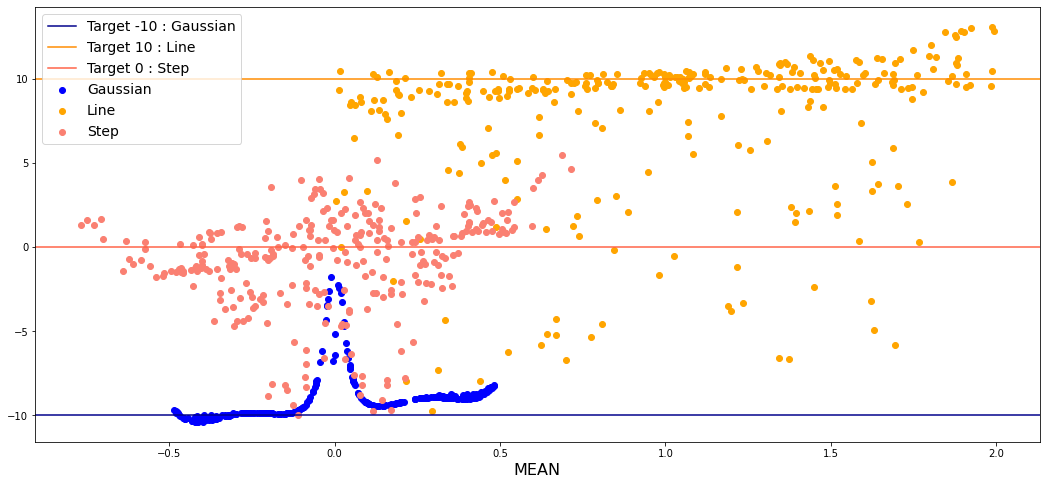

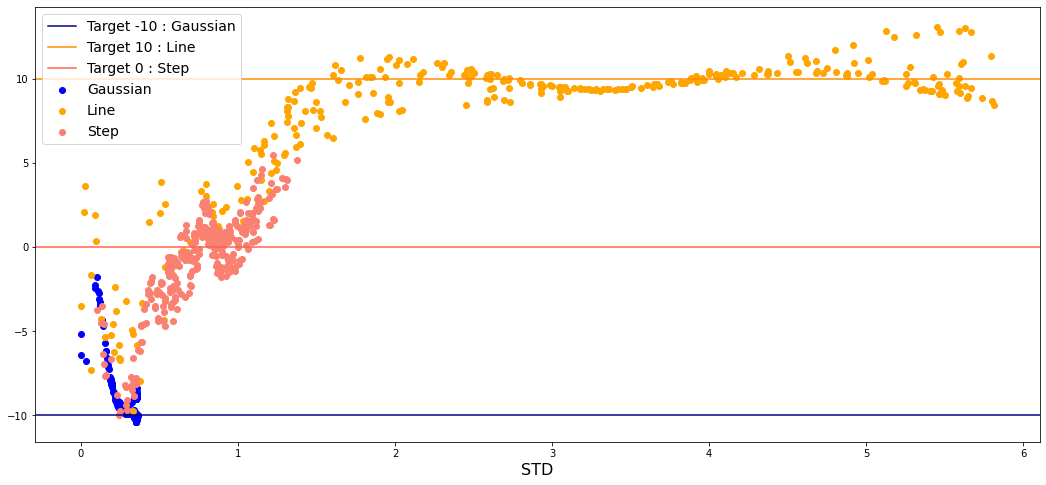

In [84]:
for i in ['MEAN','STD']:

    plt.figure(figsize=(18,8))
    plt.xlabel(i,size = 16)
    scatter_plot(function,features,i,dic_goals,classes=classes)
    plt.legend(fontsize = 14)

### Histogram plot :

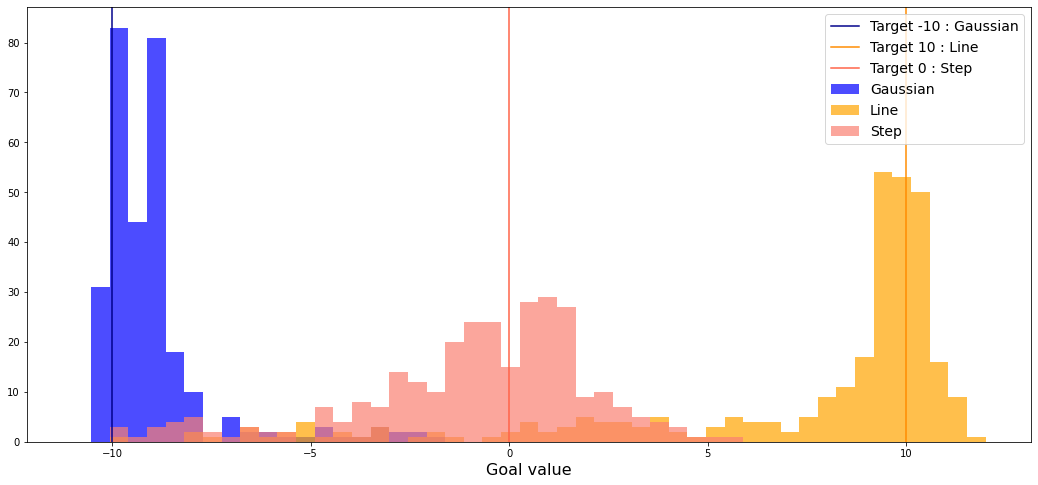

In [86]:
bins = np.linspace(-11,12,50)

plt.figure(figsize=(18,8))
plt.xlabel('Goal value',size = 16)
histo_plot(function,features,dic_goals,bins,classes = classes, alpha = 0.7)
plt.legend(fontsize = 14)